In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

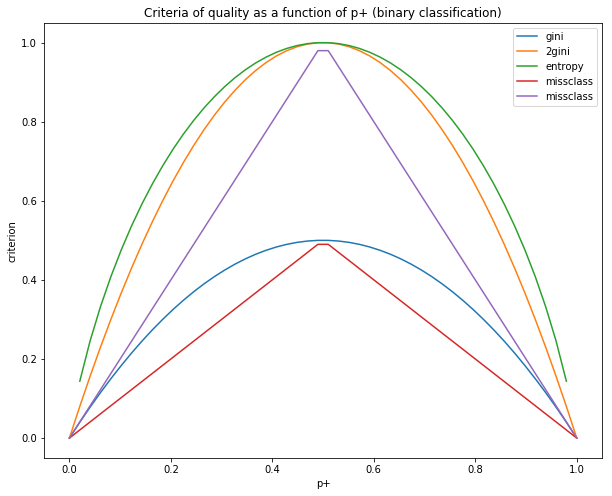

In [2]:
plt.figure(figsize=(10, 8))
df = np.linspace(0, 1, 50)
plt.plot(df, [2*x*(1-x) for x in df], label='gini')
plt.plot(df, [4*x*(1-x) for x in df], label='2gini')
plt.plot(df, [-x*np.log2(x)-(1-x)*np.log2(1-x) for x in df], label='entropy')
plt.plot(df, [1-max(x, 1-x) for x in df], label='missclass')
plt.plot(df, [2-2*max(x, 1-x) for x in df], label='missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

In [3]:
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

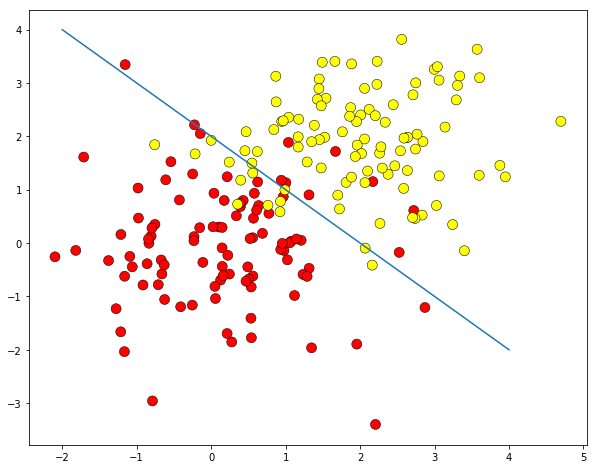

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidths=.5)
plt.plot(range(-2,5), range(4,-3,-1))

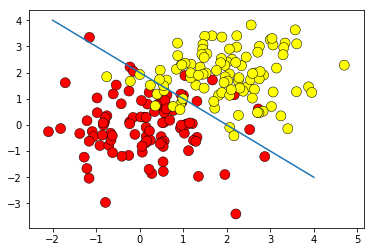

In [5]:
fix = plt.figure()
ax = fix.add_subplot(1,1,1)
ax.plot(range(-2,5), range(4,-3,-1))
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidths=.5)

# 决策树一

In [6]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, y_min = data[:, 0].min() ,data[:, 1].min()
    x_max, y_max = data[:, 0].max(), data[:, 1].max()
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [7]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

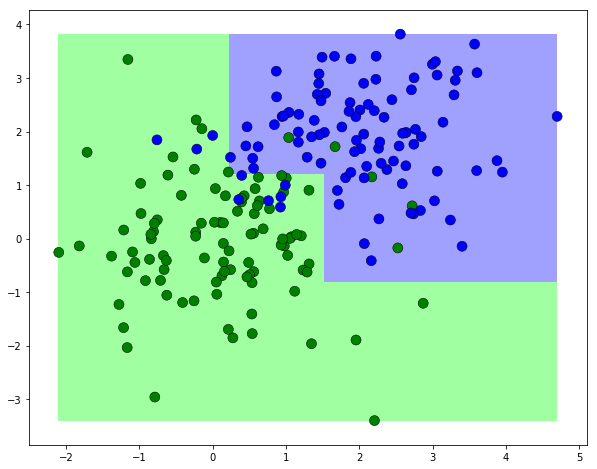

In [8]:
import matplotlib as mlp
plt.figure(figsize=(10, 8))
cm_light = mlp.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mlp.colors.ListedColormap(['g', 'r', 'b'])

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap=cm_light,)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=cm_dark, edgecolors='black', linewidths=.5)

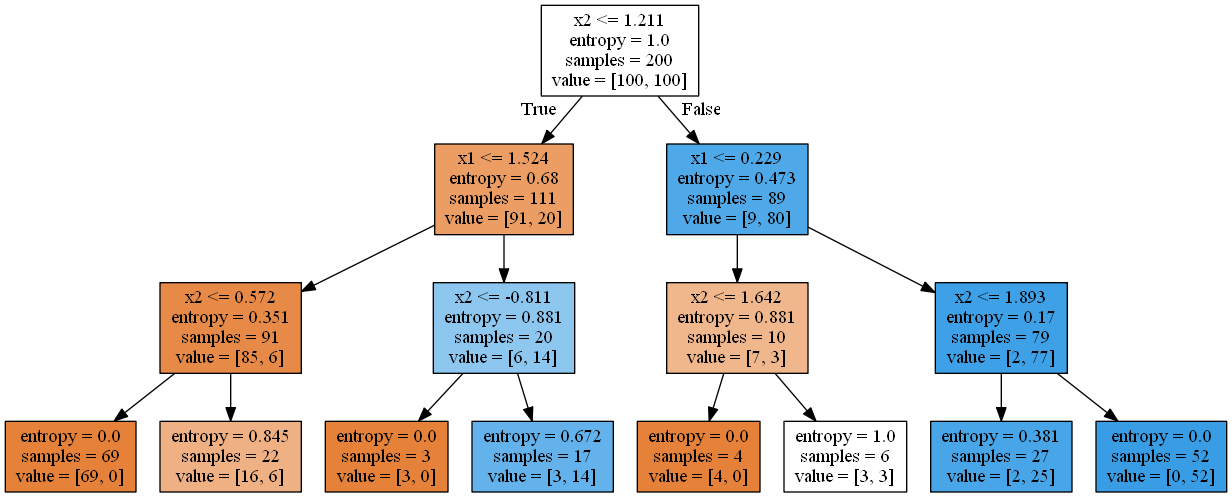

In [9]:
# use .dot format to visualize a tree
# from ipywidgets import Image
from IPython.display import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz 

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('allElectronicsData.dot')
Image(graph.create_png())

# 决策树二

In [10]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [11]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


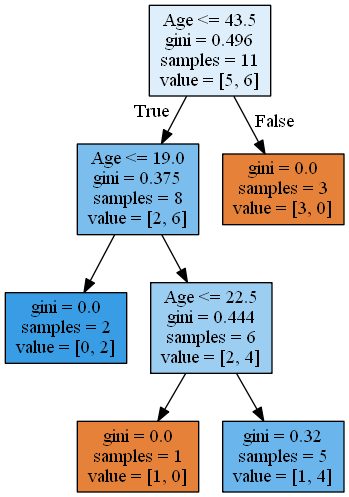

In [12]:
age_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

dot_data = StringIO()
export_graphviz(age_tree, feature_names=['Age'], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [13]:
data2 = pd.DataFrame({'Age':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Salary': [25,80,22,36,37,59,74,70,33,102,88], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data2

,Age,Loan Default,Salary
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


In [14]:
data2.sort_values('Age')

,Age,Loan Default,Salary
0,17,1,25
2,18,1,22
3,20,0,36
7,25,1,70
8,29,1,33
9,31,0,102
10,33,1,88
4,38,1,37
5,49,0,59
6,55,0,74


In [15]:
age_sal_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

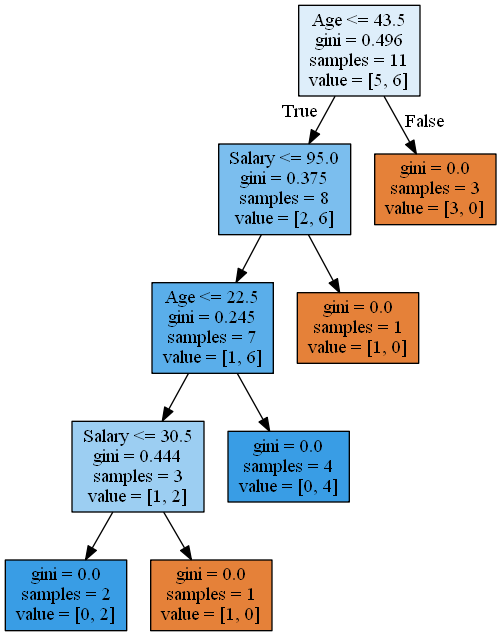

In [16]:
dot_data = StringIO()
export_graphviz(age_sal_tree, feature_names=['Age', 'Salary'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# 回归决策树

In [17]:
from sklearn.tree import DecisionTreeRegressor
n_train = 500
n_test = 1500
noise = 0.1

def f(x):
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generator(n_sample, noise):
    X = np.random.rand(n_sample) * 10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0.0, noise, n_sample)
    X = X.reshape((n_sample, 1))
    return X, y

X_train, y_train = generator(n_sample=n_train, noise=noise)
X_test, y_test = generator(n_sample=n_test, noise=noise)

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

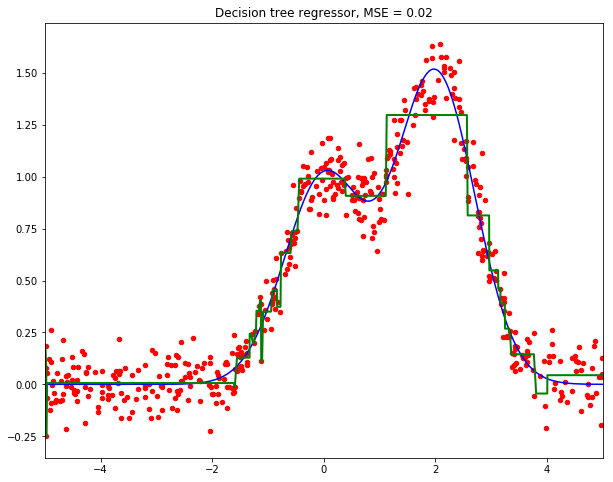

In [18]:
plt.figure(figsize=(10,8))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train,c='r', s=20)
plt.plot(X_test, reg_tree_pred, 'g', lw=2)
plt.xlim([-5, 5])
plt.title('Decision tree regressor, MSE = %.2f' % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

## K-NN

In [19]:
df = pd.read_csv('./churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
state = df['State']
y = df['Churn?'].map(lambda x:0 if x=='False.' else 1)
df.drop(['State', 'Churn?', 'Phone'], axis=1, inplace=True)

In [21]:
a = np.array(df.columns.values)
a

array(['Account Length', 'Area Code', "Int'l Plan", 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'], dtype=object)

In [22]:
b = np.array(['Account length' ,'Area code' ,'International plan' ,'Voice mail plan' ,'Number vmail messages' ,'Total day minutes' ,'Total day calls' ,'Total day charge' ,'Total eve minutes' ,'Total eve calls' ,'Total eve charge' ,'Total night minutes' ,'Total night calls' ,'Total night charge' ,'Total intl minutes' ,'Total intl calls' ,'Total intl charge' ,'Customer service calls'])
b

array(['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='<U22')

In [23]:
c = dict(zip(a,b))
c

{'Account Length': 'Account length',
 'Area Code': 'Area code',
 'CustServ Calls': 'Customer service calls',
 'Day Calls': 'Total day calls',
 'Day Charge': 'Total day charge',
 'Day Mins': 'Total day minutes',
 'Eve Calls': 'Total eve calls',
 'Eve Charge': 'Total eve charge',
 'Eve Mins': 'Total eve minutes',
 "Int'l Plan": 'International plan',
 'Intl Calls': 'Total intl calls',
 'Intl Charge': 'Total intl charge',
 'Intl Mins': 'Total intl minutes',
 'Night Calls': 'Total night calls',
 'Night Charge': 'Total night charge',
 'Night Mins': 'Total night minutes',
 'VMail Message': 'Number vmail messages',
 'VMail Plan': 'Voice mail plan'}

In [24]:
df.rename(columns=c, inplace=True)
df.columns.values

array(['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype=object)

In [25]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [26]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]

In [27]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### DecisionTreeClassifier,KNeighborsClassifier

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X_train , X_holdout, y_train, y_holdout = train_test_split(df.values, y , test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [30]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [31]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

### GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth':range(1, 11), 'max_features':range(4, 19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [33]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [34]:
tree_grid.best_score_

0.9425632233176168

In [35]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

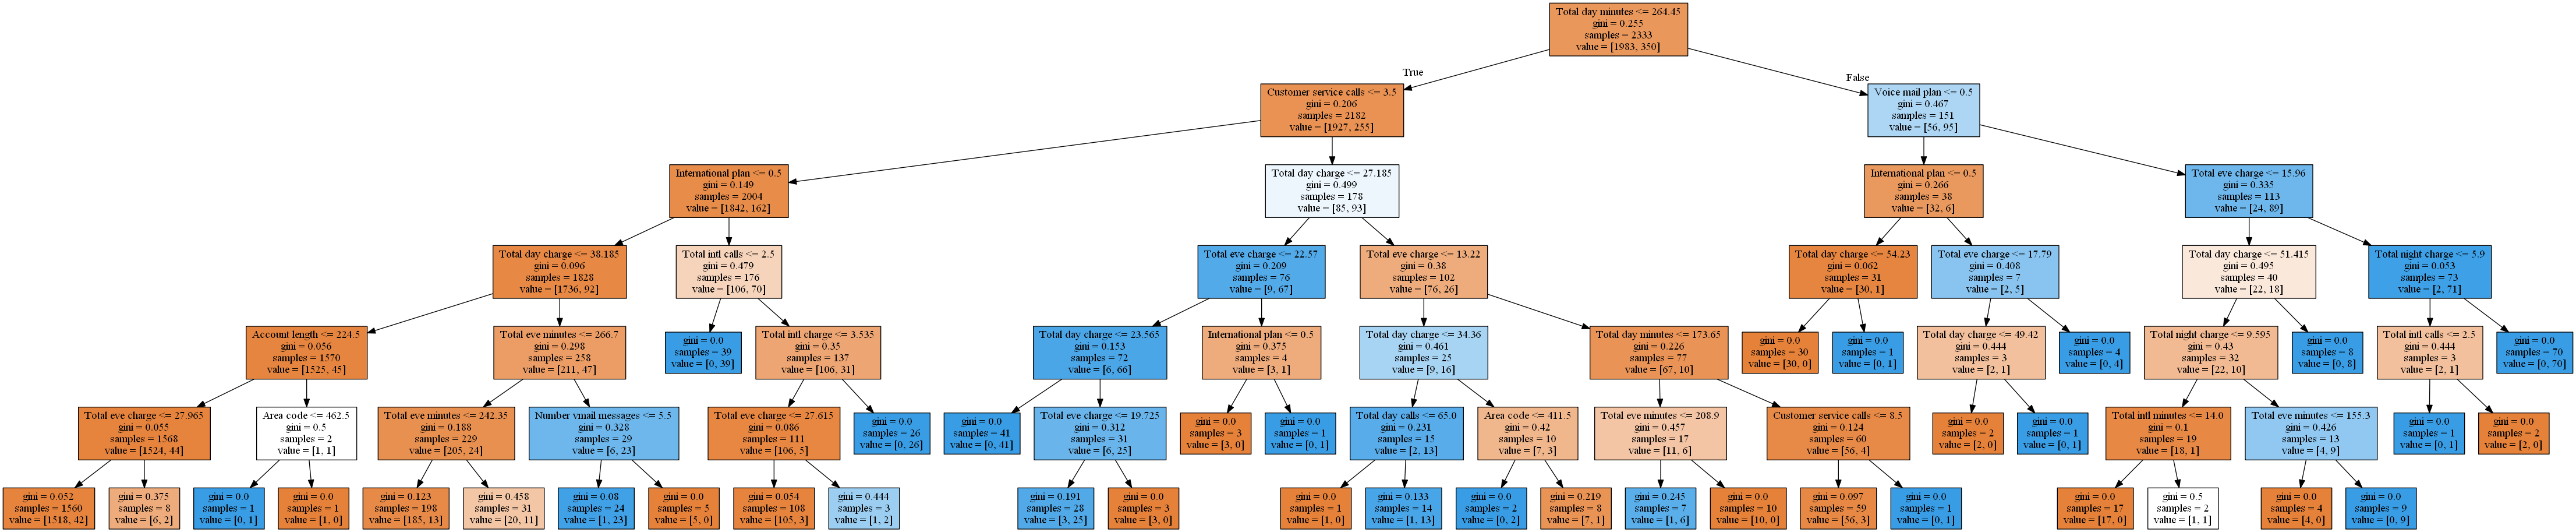

In [36]:
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors':range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.7s finished


({'knn__n_neighbors': 7}, 0.8859837119588513)

In [38]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

## RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
np.mean(cross_val_score(forest, X_train, y_train, cv=5))

0.9494233119813256

In [40]:
forest_params = {'max_depth':range(1,11), 'max_features':range(4,19)}
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)
forest_grid.best_params_,forest_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.9min finished


({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [41]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) 

0.953

# Complex Case for Decision Trees

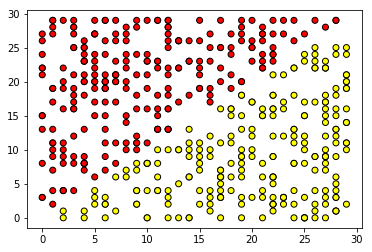

In [42]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

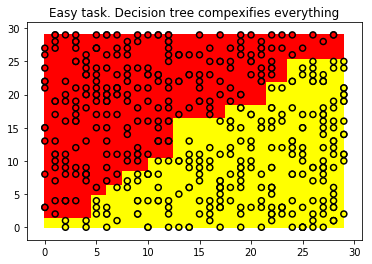

In [43]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

x_, y_ = get_grid(X)
predicted = tree.predict(np.c_[x_.ravel(), y_.ravel()]).reshape(x_.shape)
plt.pcolormesh(x_, y_, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.title('Easy task. Decision tree compexifies everything');

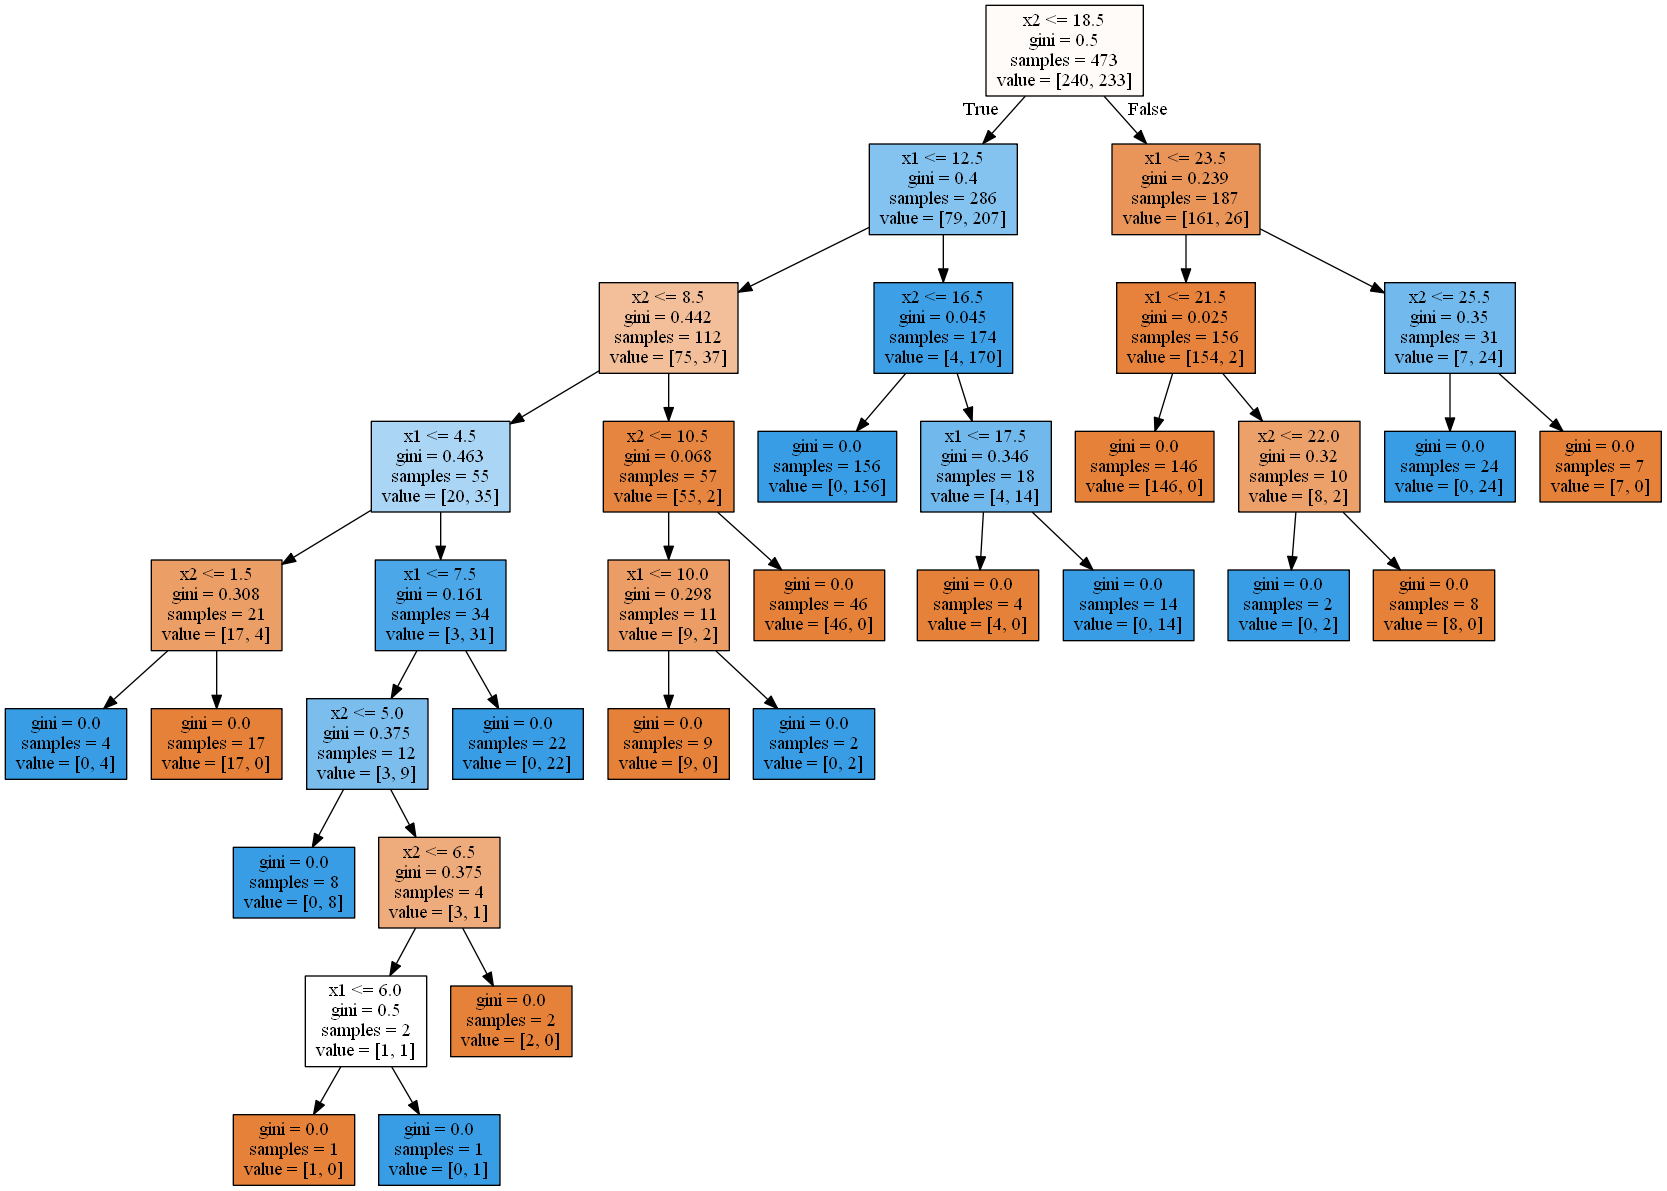

In [44]:
dot_data = StringIO()
export_graphviz(tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

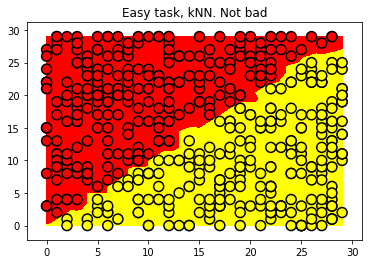

In [45]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');